In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy import interpolate

### Druh konečného prvku, nainicializování bodů a vah Gaussovy-Legendreovy kvadratury

In [2]:
n = 9 #2D konecne prvky (obdelniky na parametrickem prostoru) (9 B-spline funkci na 1 konecny prvek)

line_o3_QP = np.array([-np.sqrt(3/5), 0, np.sqrt(3/5)], dtype=np.float64)
line_o3_QW = np.array([5/9, 8/9, 5/9], dtype=np.float64)
tmp = np.ones(shape=line_o3_QW.shape, dtype=np.float64)
quad_o3_QP = np.vstack((np.kron(tmp, line_o3_QP), np.kron(line_o3_QP, tmp))) # Gaussovy body
quad_o3_QW = np.kron(line_o3_QW, line_o3_QW) # vahy

nqp = quad_o3_QP.shape[1] # celkovy pocet pouzitych Gaussovych bodu

### Definice kvadratických B-spline násadových funkcí a jejich derivací na konečném prvku parametrického prostoru, definice lineárních násadových funkcí a jejich derivací na příslušném referenčním prvku

Lineární násadové funkce jsou použity pro zobrazení bodů referenčního prvku na body konkrétního konečného prvku.

In [3]:
def quad9_N_e(knt_xi: np.ndarray, knt_eta: np.ndarray, knt_ind_b: np.ndarray, rs: np.ndarray) -> np.ndarray:

    return np.vstack((interpolate.BSpline.basis_element(knt_xi[knt_ind_b[0, 0]:knt_ind_b[0, 0] + 4], False)(rs[0,:])*interpolate.BSpline.basis_element(knt_eta[knt_ind_b[1, 0]:knt_ind_b[1, 0] + 4], False)(rs[1,:]),
                      interpolate.BSpline.basis_element(knt_xi[knt_ind_b[0, 1]:knt_ind_b[0, 1] + 4], False)(rs[0,:])*interpolate.BSpline.basis_element(knt_eta[knt_ind_b[1, 1]:knt_ind_b[1, 1] + 4], False)(rs[1,:]),
                      interpolate.BSpline.basis_element(knt_xi[knt_ind_b[0, 2]:knt_ind_b[0, 2] + 4], False)(rs[0,:])*interpolate.BSpline.basis_element(knt_eta[knt_ind_b[1, 2]:knt_ind_b[1, 2] + 4], False)(rs[1,:]),
                      interpolate.BSpline.basis_element(knt_xi[knt_ind_b[0, 3]:knt_ind_b[0, 3] + 4], False)(rs[0,:])*interpolate.BSpline.basis_element(knt_eta[knt_ind_b[1, 3]:knt_ind_b[1, 3] + 4], False)(rs[1,:]),
                      interpolate.BSpline.basis_element(knt_xi[knt_ind_b[0, 4]:knt_ind_b[0, 4] + 4], False)(rs[0,:])*interpolate.BSpline.basis_element(knt_eta[knt_ind_b[1, 4]:knt_ind_b[1, 4] + 4], False)(rs[1,:]),
                      interpolate.BSpline.basis_element(knt_xi[knt_ind_b[0, 5]:knt_ind_b[0, 5] + 4], False)(rs[0,:])*interpolate.BSpline.basis_element(knt_eta[knt_ind_b[1, 5]:knt_ind_b[1, 5] + 4], False)(rs[1,:]),
                      interpolate.BSpline.basis_element(knt_xi[knt_ind_b[0, 6]:knt_ind_b[0, 6] + 4], False)(rs[0,:])*interpolate.BSpline.basis_element(knt_eta[knt_ind_b[1, 6]:knt_ind_b[1, 6] + 4], False)(rs[1,:]),
                      interpolate.BSpline.basis_element(knt_xi[knt_ind_b[0, 7]:knt_ind_b[0, 7] + 4], False)(rs[0,:])*interpolate.BSpline.basis_element(knt_eta[knt_ind_b[1, 7]:knt_ind_b[1, 7] + 4], False)(rs[1,:]),
                      interpolate.BSpline.basis_element(knt_xi[knt_ind_b[0, 8]:knt_ind_b[0, 8] + 4], False)(rs[0,:])*interpolate.BSpline.basis_element(knt_eta[knt_ind_b[1, 8]:knt_ind_b[1, 7] + 4], False)(rs[1,:])))

def quad9_dNdxi_e(knt_xi: np.ndarray, knt_eta: np.ndarray, knt_ind_b: np.ndarray, rs: np.ndarray) -> np.ndarray:

    return np.vstack((np.hstack((interpolate.BSpline.basis_element(knt_xi[knt_ind_b[0, 0]:knt_ind_b[0, 0] + 4], False)(rs[0,:], nu=1)*interpolate.BSpline.basis_element(knt_eta[knt_ind_b[1, 0]:knt_ind_b[1, 0] + 4], False)(rs[1,:]),
                                 interpolate.BSpline.basis_element(knt_xi[knt_ind_b[0, 0]:knt_ind_b[0, 0] + 4], False)(rs[0,:])*interpolate.BSpline.basis_element(knt_eta[knt_ind_b[1, 0]:knt_ind_b[1, 0] + 4], False)(rs[1,:], nu=1))),
                      np.hstack((interpolate.BSpline.basis_element(knt_xi[knt_ind_b[0, 1]:knt_ind_b[0, 1] + 4], False)(rs[0,:], nu=1)*interpolate.BSpline.basis_element(knt_eta[knt_ind_b[1, 1]:knt_ind_b[1, 1] + 4], False)(rs[1,:]),
                                 interpolate.BSpline.basis_element(knt_xi[knt_ind_b[0, 1]:knt_ind_b[0, 1] + 4], False)(rs[0,:])*interpolate.BSpline.basis_element(knt_eta[knt_ind_b[1, 1]:knt_ind_b[1, 1] + 4], False)(rs[1,:], nu=1))),
                      np.hstack((interpolate.BSpline.basis_element(knt_xi[knt_ind_b[0, 2]:knt_ind_b[0, 2] + 4], False)(rs[0,:], nu=1)*interpolate.BSpline.basis_element(knt_eta[knt_ind_b[1, 2]:knt_ind_b[1, 2] + 4], False)(rs[1,:]),
                                 interpolate.BSpline.basis_element(knt_xi[knt_ind_b[0, 2]:knt_ind_b[0, 2] + 4], False)(rs[0,:])*interpolate.BSpline.basis_element(knt_eta[knt_ind_b[1, 2]:knt_ind_b[1, 2] + 4], False)(rs[1,:], nu=1))),
                      np.hstack((interpolate.BSpline.basis_element(knt_xi[knt_ind_b[0, 3]:knt_ind_b[0, 3] + 4], False)(rs[0,:], nu=1)*interpolate.BSpline.basis_element(knt_eta[knt_ind_b[1, 3]:knt_ind_b[1, 3] + 4], False)(rs[1,:]),
                                 interpolate.BSpline.basis_element(knt_xi[knt_ind_b[0, 3]:knt_ind_b[0, 3] + 4], False)(rs[0,:])*interpolate.BSpline.basis_element(knt_eta[knt_ind_b[1, 3]:knt_ind_b[1, 3] + 4], False)(rs[1,:], nu=1))),
                      np.hstack((interpolate.BSpline.basis_element(knt_xi[knt_ind_b[0, 4]:knt_ind_b[0, 4] + 4], False)(rs[0,:], nu=1)*interpolate.BSpline.basis_element(knt_eta[knt_ind_b[1, 4]:knt_ind_b[1, 4] + 4], False)(rs[1,:]),
                                 interpolate.BSpline.basis_element(knt_xi[knt_ind_b[0, 4]:knt_ind_b[0, 4] + 4], False)(rs[0,:])*interpolate.BSpline.basis_element(knt_eta[knt_ind_b[1, 4]:knt_ind_b[1, 4] + 4], False)(rs[1,:], nu=1))),
                      np.hstack((interpolate.BSpline.basis_element(knt_xi[knt_ind_b[0, 5]:knt_ind_b[0, 5] + 4], False)(rs[0,:], nu=1)*interpolate.BSpline.basis_element(knt_eta[knt_ind_b[1, 5]:knt_ind_b[1, 5] + 4], False)(rs[1,:]),
                                 interpolate.BSpline.basis_element(knt_xi[knt_ind_b[0, 5]:knt_ind_b[0, 5] + 4], False)(rs[0,:])*interpolate.BSpline.basis_element(knt_eta[knt_ind_b[1, 5]:knt_ind_b[1, 5] + 4], False)(rs[1,:], nu=1))),
                      np.hstack((interpolate.BSpline.basis_element(knt_xi[knt_ind_b[0, 6]:knt_ind_b[0, 6] + 4], False)(rs[0,:], nu=1)*interpolate.BSpline.basis_element(knt_eta[knt_ind_b[1, 6]:knt_ind_b[1, 6] + 4], False)(rs[1,:]),
                                 interpolate.BSpline.basis_element(knt_xi[knt_ind_b[0, 6]:knt_ind_b[0, 6] + 4], False)(rs[0,:])*interpolate.BSpline.basis_element(knt_eta[knt_ind_b[1, 6]:knt_ind_b[1, 6] + 4], False)(rs[1,:], nu=1))),
                      np.hstack((interpolate.BSpline.basis_element(knt_xi[knt_ind_b[0, 7]:knt_ind_b[0, 7] + 4], False)(rs[0,:], nu=1)*interpolate.BSpline.basis_element(knt_eta[knt_ind_b[1, 7]:knt_ind_b[1, 7] + 4], False)(rs[1,:]),
                                 interpolate.BSpline.basis_element(knt_xi[knt_ind_b[0, 7]:knt_ind_b[0, 7] + 4], False)(rs[0,:])*interpolate.BSpline.basis_element(knt_eta[knt_ind_b[1, 7]:knt_ind_b[1, 7] + 4], False)(rs[1,:], nu=1))),
                      np.hstack((interpolate.BSpline.basis_element(knt_xi[knt_ind_b[0, 8]:knt_ind_b[0, 8] + 4], False)(rs[0,:], nu=1)*interpolate.BSpline.basis_element(knt_eta[knt_ind_b[1, 8]:knt_ind_b[1, 7] + 4], False)(rs[1,:]),
                                 interpolate.BSpline.basis_element(knt_xi[knt_ind_b[0, 8]:knt_ind_b[0, 8] + 4], False)(rs[0,:])*interpolate.BSpline.basis_element(knt_eta[knt_ind_b[1, 8]:knt_ind_b[1, 8] + 4], False)(rs[1,:], nu=1)))))

def quad_M(rs: np.ndarray) -> np.ndarray:

    return 0.25*np.vstack(((1-rs[0,:])*(1-rs[1,:]),
                           (1+rs[0,:])*(1-rs[1,:]),
                           (1+rs[0,:])*(1+rs[1,:]),
                           (1-rs[0,:])*(1+rs[1,:])))

def quad_dMdxi(rs: np.ndarray) -> np.ndarray:

    return 0.25*np.vstack((np.hstack((-(1-rs[1,:]), -(1-rs[0,:]))),
                           np.hstack((+(1-rs[1,:]), -(1+rs[0,:]))),
                           np.hstack((+(1+rs[1,:]), +(1+rs[0,:]))),
                           np.hstack((-(1+rs[1,:]), +(1-rs[0,:])))))

### Výpočet hodnot lineárních násadových funkcí a hodnot jejich derivací v bodech Gaussovy kvadratury

(kvůli zobrazení bodů referenčního prvku na body konkrétního konečného prvku)

In [4]:
quad_o3_QP_M = quad_M(quad_o3_QP)

tmp = quad_dMdxi(quad_o3_QP)
dMdxi = np.zeros(shape=(nqp, 4, 2), dtype=np.float64)
dMdxi[:, :, 0] = tmp[:, 0:nqp].T
dMdxi[:, :, 1] = tmp[:, nqp:2*nqp].T

### Příslušný uzlový vektor a řídící body, dekompozice parametrického prostoru na konečné prvky

In [5]:
knt_xi = np.array([0, 0, 0, 1, 2, 3, 3, 3], dtype=np.float64) # uzlove vektory
knt_eta = np.array([0, 0, 0, 1, 2, 3, 4, 4, 4], dtype=np.float64)

ctrl_pol_b = np.array([[0.0, 0.0], [1.0, 0.0], [2.0, 0.0], [3.0, 0.0], [4.0, 0.0],
                       [0.0, 1.75], [1.0, 1.5], [2.0, 1.25], [3.0, 1.0], [4.0, 0.75],
                       [0.875, 4.375], [1.75, 3.75], [2.625, 3.125], [3.5, 2.5], [4.375, 1.875],
                       [2.625, 6.125], [3.25, 5.25], [3.875, 4.375], [4.5, 3.5], [5.125, 2.625],
                       [5.25, 7.0], [5.5, 6.0], [5.75, 5.0], [6.0, 4.0], [6.25, 3.0],
                       [7.0, 7.0], [7.0, 6.0], [7.0, 5.0], [7.0, 4.0], [7.0, 3.0]], dtype=np.float64) # ridici body

N_n = np.array([4, 5])
ne = np.prod(N_n - 1) # pocet pouzitych konecnych prvku
nn = np.prod(N_n) # pocet uzlu (tez uzlovych bodu)

ind_n = np.zeros(shape=(N_n[1], N_n[0]), dtype=np.int64) # matice globalnich indexu uzlu
ind_n[:, :] = np.reshape([ i for i in range(0, nn) ], newshape=(N_n[1], N_n[0]))
mesh_ele_n = np.column_stack((np.reshape(ind_n[0:-1, 0:-1], newshape=ne),
                              np.reshape(ind_n[0:-1, 1:], newshape=ne),
                              np.reshape(ind_n[1:, 1:], newshape=ne),
                              np.reshape(ind_n[1:, 0:-1], newshape=ne))) # matice urcujici vztah mezi lokalnimi (na jednom konecnem prvku)
                                                                         # a globalnimi indexy uzlu (zobrazeni l2g_nod)
xixi, etaeta = np.meshgrid(knt_xi[2:6], knt_eta[2:7])
mesh_coo_n = np.column_stack((np.reshape(xixi, newshape=nn), np.reshape(etaeta, newshape=nn))) # uzly na parametrickem prostoru

N_b = np.array([knt_xi.shape[0] - 2 - 1, knt_eta.shape[0] - 2 - 1])
nb = np.prod(N_b) # pocet nasadovych funkci

ind_b = np.zeros(shape=(N_b[1], N_b[0]), dtype=np.int64) # matice globalnich indexu nasadovych funkci
ind_b[:, :] = np.reshape([ i for i in range(0, nb) ], newshape=(N_b[1], N_b[0]))
mesh_ele_b = np.column_stack((np.reshape(ind_b[0:4, 0:3], newshape=ne),
                              np.reshape(ind_b[0:4, 1:4], newshape=ne),
                              np.reshape(ind_b[0:4, 2:5], newshape=ne),
                              np.reshape(ind_b[1:5, 0:3], newshape=ne),
                              np.reshape(ind_b[1:5, 1:4], newshape=ne),
                              np.reshape(ind_b[1:5, 2:5], newshape=ne),
                              np.reshape(ind_b[2:6, 0:3], newshape=ne),
                              np.reshape(ind_b[2:6, 1:4], newshape=ne),
                              np.reshape(ind_b[2:6, 2:5], newshape=ne))) # matice urcujici vztah mezi lokalnimi (na jednom konecnem prvku)
                                                                         # a globalnimi indexy nasadovych funkci (zobrazeni l2g)

knt_ind_b = np.vstack((np.kron(np.ones(shape=6, dtype=np.int64), np.array([0, 1, 2, 3, 4], dtype=np.int64)),
                       np.kron(np.array([0, 1, 2, 3, 4, 5], dtype=np.int64), np.ones(shape=5, dtype=np.int64))))

### Sestavení matice tuhosti a vektoru zatížení

In [6]:
K = np.zeros(shape=(nb, nb), dtype=np.float64)

dNdxi = np.zeros(shape=(nqp, n, 2), dtype=np.float64)
for e in range(ne):
    ele_n_e = mesh_ele_n[e, :]
    ele_b_e = mesh_ele_b[e, :]

    P_phi = mesh_coo_n[ele_n_e, :]
    P3D_phi = np.zeros(shape=(nqp, 4, 2), dtype=np.float64)
    P3D_phi[:, :, :] = P_phi
    
    J_phi = P3D_phi.transpose(0, 2, 1) @ dMdxi # hodnoty jakobianu zobrazeni phi^e v Gaussovych bodech
    detJ_phi = J_phi[:, 0, 0]*J_phi[:, 1, 1] - J_phi[:, 0, 1]*J_phi[:, 1, 0] # hodnoty determinantu jakobianu zobrazeni phi^e v Gaussovych bodech

    quad_o3_QP_e = P_phi.T @ quad_o3_QP_M # zobrazeni Gaussovych bodu na konecny prvek na parametrickem prostoru
    tmp = quad9_dNdxi_e(knt_xi, knt_eta, knt_ind_b[:, ele_b_e], quad_o3_QP_e) # hodnoty derivaci B-spline nasadovych funkci na parametrickem prostoru
    dNdxi[:, :, 0] = tmp[:, 0:nqp].T                                          # v Gaussovych bodech (zobrazenych na konecny prvek na parametrickem prostoru)
    dNdxi[:, :, 1] = tmp[:, nqp:2*nqp].T

    P_spq = ctrl_pol_b[ele_b_e, :]
    P3D_spq = np.zeros(shape=(nqp, n, 2), dtype=np.float64)
    P3D_spq[:, :, :] = P_spq

    J_spq = P3D_spq.transpose(0, 2, 1) @ dNdxi # hodnoty jakobianu zobrazeni S_pq (B-spline plochy stupne p=2 a q=2) v Gaussovych bodech (zobrazenych na konecny prvek na parametrickem prostoru)
    detJ_spq = J_spq[:, 0, 0]*J_spq[:, 1, 1] - J_spq[:, 0, 1]*J_spq[:, 1, 0] # hodnoty determinantu jakobianu zobrazeni S_pq v Gaussovych bodech (zobrazenych na konecny prvek na parametrickem prostoru)

    invJ_spq = np.zeros(shape=(nqp, 2, 2), dtype=np.float64) # hodnoty inverze jakobianu zobrazeni S_pq v Gaussovych bodech (zobrazenych na konecny prvek na parametrickem prostoru)
    invJ_spq[:, 0, 0] =  J_spq[:, 1, 1]/detJ_spq             # (pomoci Cramerova pravidla)
    invJ_spq[:, 0, 1] = -J_spq[:, 0, 1]/detJ_spq
    invJ_spq[:, 1, 0] = -J_spq[:, 1, 0]/detJ_spq
    invJ_spq[:, 1, 1] =  J_spq[:, 0, 0]/detJ_spq

    detJ = detJ_spq*detJ_phi # hodnoty determinantu jakobianu zobrazeni Z^e v Gaussovych bodech
    absdetJ = np.abs(detJ)

    dNdX = dNdxi @ invJ_spq

    tmp = np.reshape((dNdX @ dNdX.transpose(0, 2, 1)).transpose(2, 1, 0), newshape=(n*n, nqp)) # lokalni matice tuhosti
    Kloc_flattened = tmp @ (absdetJ*quad_o3_QW)

    tmp = np.ones(shape=n, dtype=np.int64)
    K_ind_i = np.kron(ele_b_e, tmp)
    K_ind_j = np.kron(tmp, ele_b_e)
    K[K_ind_i, K_ind_j] += Kloc_flattened

f = np.zeros(shape=nb, dtype=np.float64)

print(np.linalg.norm(K @ np.ones(shape=nb))) # test

7.472456031606033e-16


### Zahrnutí Dirichletovy okrajové podmínky, sestavení a vyřešení příslušné soustavy

In [7]:
nbd = 18 # pocet nasadovych funkci majicich nenulovou stopu na Gamma_D
ind_bd = np.hstack((ind_b[0, :], ind_b[1:-1, 0], ind_b[1:-1, -1], ind_b[-1, :])) # globalni indexy nasadovych funkci majicich nenulovou stopu na Gamma_D

# Ziskani koeficientu pro nasadove funkce s nenulovou stopou na Gamma_1 pomoci interpolace (zpracovano v 1D forme)
Gam1_xi_expts = np.array([0, 0.5, 1.5, 2.5, 3])
Gam1_x_expts = interpolate.BSpline(knt_xi, np.array([0, 1, 2, 3, 4]), 2, False)(Gam1_xi_expts)
Gam1_x_expts_v = -(1/8)*(Gam1_x_expts**2) + 3
A_int_Gam1 = np.column_stack((interpolate.BSpline.basis_element(knt_xi[0:4], False)(Gam1_xi_expts),
                              interpolate.BSpline.basis_element(knt_xi[1:5], False)(Gam1_xi_expts),
                              interpolate.BSpline.basis_element(knt_xi[2:6], False)(Gam1_xi_expts),
                              interpolate.BSpline.basis_element(knt_xi[3:7], False)(Gam1_xi_expts),
                              interpolate.BSpline.basis_element(knt_xi[4:8], False)(Gam1_xi_expts)))
A_int_Gam1[np.isnan(A_int_Gam1)] = 0 # Odstraneni NaN u prvku, kde ma byt spravne hodnota 0
A_int_Gam1[4, 4] = 1 # Bug fix (spravna hodnota prvku je 1, nikoliv 0)
b_int_Gam1 = Gam1_x_expts_v
Gam1_c = np.linalg.solve(A_int_Gam1, b_int_Gam1)

g = np.zeros(shape=nbd, dtype=np.float64)
g[0:5] = Gam1_c
g[5:9] = 3
g[9:-5] = 1
g[-5:] = Gam1_c

B = np.zeros(shape=(nbd, nb), dtype=np.float64)
B[[ i for i in range(nbd) ], ind_bd] = 1

A = np.zeros(shape=(nb + nbd, nb + nbd), dtype=np.float64)
A[0:nb, 0:nb] = K
A[nb:, 0:nb] = B
A[0:nb, nb:] = B.T

b = np.zeros(shape=(nb + nbd), dtype=np.float64)
b[0:nb] = f
b[nb:] = g

iga_sol_c = np.linalg.solve(A, b)[0:nb]

### Vykreslení přibližného řešení

In [8]:
# Deklarace a definice pomocnych funkci

def bspl_surf_mpts(xixi: np.ndarray, etaeta: np.ndarray, ctrlpts: np.ndarray):
    bspl_basis_xi = []
    c_xi = np.zeros(shape=5, dtype=np.float64)
    for i in range(5):
        bspl_basis_xi.append(interpolate.BSpline(knt_xi, c_xi, 2, extrapolate=False))

    bspl_basis_eta = []
    c_eta = np.zeros(shape=6, dtype=np.float64)
    for i in range(6):
        bspl_basis_eta.append(interpolate.BSpline(knt_eta, c_eta, 2, extrapolate=False))
    
    xx = np.zeros(shape=xixi.shape, dtype=np.float64)
    yy = np.zeros(shape=etaeta.shape, dtype=np.float64)
    for i in range(6):
        c_eta[i] = 1
        for j in range(5):
            c_xi[j] = 1
            xx += ctrlpts[i, j, 0]*bspl_basis_xi[j](xixi)*bspl_basis_eta[i](etaeta)
            yy += ctrlpts[i, j, 1]*bspl_basis_xi[j](xixi)*bspl_basis_eta[i](etaeta)
            c_xi[j] = 0
        c_eta[i] = 0

    return xx, yy

def bspl_surf_evalpts(xixi: np.ndarray, etaeta: np.ndarray, ctrlpts: np.ndarray):
    bspl_basis_xi = []
    c_xi = np.zeros(shape=5, dtype=np.float64)
    for i in range(5):
        bspl_basis_xi.append(interpolate.BSpline(knt_xi, c_xi, 2, extrapolate=False))

    bspl_basis_eta = []
    c_eta = np.zeros(shape=6, dtype=np.float64)
    for i in range(6):
        bspl_basis_eta.append(interpolate.BSpline(knt_eta, c_eta, 2, extrapolate=False))
    
    vals = np.zeros(shape=xixi.shape, dtype=np.float64)
    for i in range(6):
        c_eta[i] = 1
        for j in range(5):
            c_xi[j] = 1
            vals += ctrlpts[i, j, 2]*bspl_basis_xi[j](xixi)*bspl_basis_eta[i](etaeta)
            c_xi[j] = 0
        c_eta[i] = 0

    return vals

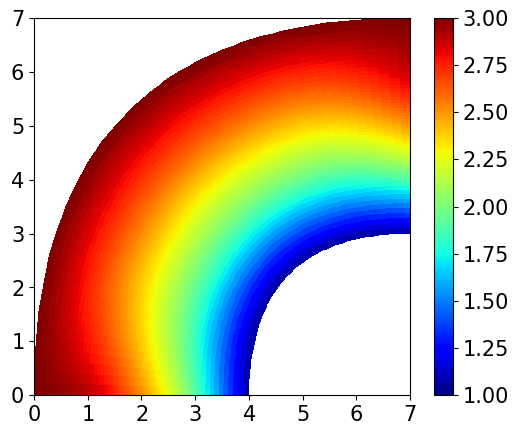

In [9]:
ctrlpts = np.zeros(shape=(6, 5, 3))
for i in range(6):
    for j in range(5):
        ctrlpts[i, j, :] = np.hstack((ctrl_pol_b[5*i + j, :], iga_sol_c[5*i + j]))

plot_mesh_xixi, plot_mesh_etaeta = np.meshgrid(np.linspace(0, 3, 60), np.linspace(0, 4, 60))

plot_mesh_xx, plot_mesh_yy = bspl_surf_mpts(plot_mesh_xixi, plot_mesh_etaeta, ctrlpts)
plot_mesh_v = bspl_surf_evalpts(plot_mesh_xixi, plot_mesh_etaeta, ctrlpts)

fig, ax = plt.subplots(figsize=(6.07, 4.9))
cmesh = ax.pcolormesh(plot_mesh_xx, plot_mesh_yy, plot_mesh_v[:-1, :-1], cmap='jet', vmin=np.min(plot_mesh_v), vmax=np.max(plot_mesh_v))
cbar = fig.colorbar(cmesh)

ax.set_xticks([0, 1, 2, 3, 4, 5, 6, 7])
ax.set_xticklabels([r'$0$', r'$1$', r'$2$', r'$3$', r'$4$', r'$5$', r'$6$', r'$7$'], fontsize=15)
ax.set_yticks([0, 1, 2, 3, 4, 5, 6, 7])
ax.set_yticklabels([r'$0$', r'$1$', r'$2$', r'$3$', r'$4$', r'$5$', r'$6$', r'$7$'], fontsize=15)

cbar.ax.tick_params(labelsize=15)

plt.show()